# Signal extraction and reconstruction with DiFuMo atlas

### 1. How to extract signal with functional modes of ```64``` dimensions

In [6]:
%matplotlib inline

In [7]:
import warnings

warnings.simplefilter("ignore")

In [8]:
# Fetch n=10 brain images for demo

from nilearn.datasets import fetch_localizer_contrasts

localizer_data = fetch_localizer_contrasts(contrasts=["sentence listening"],
                                           n_subjects=10, get_anats=True)
cmaps = localizer_data.cmaps
anats = localizer_data.anats

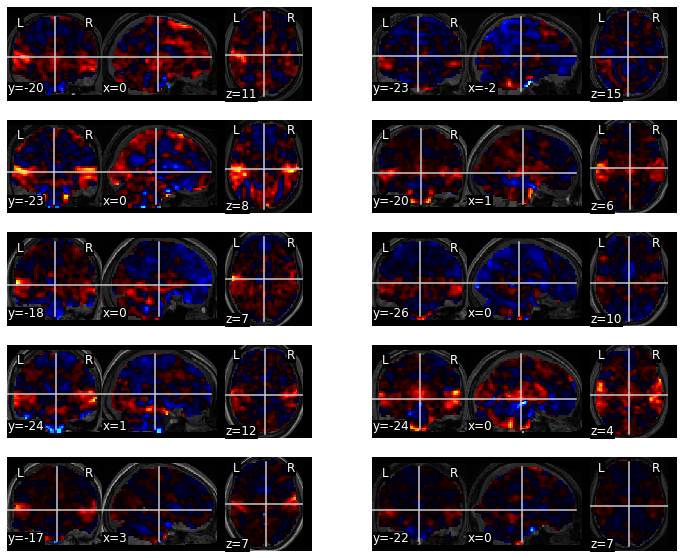

In [9]:
# Simply visualize sentence listening activations on subject-specific T1 image

import matplotlib.pyplot as plt
from nilearn import plotting

fig, axes = plt.subplots(figsize=(12, 10), ncols=2, nrows=5)
axes = axes.reshape(-1)

cut_coords = []

for i, (anat_img, cmap) in enumerate(zip(anats, cmaps)):
    display = plotting.plot_stat_map(cmap, bg_img=anat_img,
                                     figure=fig, axes=axes[i],
                                     colorbar=False)
    cut_coords.append(display.cut_coords)

In [10]:
# Fetch brain atlases for signal extraction

from fetcher import fetch_difumo
maps_img = fetch_difumo(dimension=64).maps

Extraction signal of functional modes

Implemented using ```nilearn.input_data.NiftiMapsMasker``` under the hood **linear regression**



In [11]:
from nilearn.input_data import NiftiMapsMasker

maps_masker = NiftiMapsMasker(maps_img=maps_img, verbose=1)

In [12]:
signals = maps_masker.fit_transform(cmaps)

[NiftiMapsMasker.fit_transform] loading regions from /home/kdadi/nilearn_data/difumo/DiFuMo_atlases/64/maps.nii.gz
Resampling maps
[NiftiMapsMasker.transform_single_imgs] Loading data from [/home/kdadi/nilearn_data/brainomics_localizer/brainomics_data/S01/c_map_auditory_sentences.nii.gz, /home/kdadi/nilearn_data/brainomics_localizer/brainomics_data/S02/c_map_auditory_sentences.nii.gz, /
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
[NiftiMapsMasker.transform_single_imgs] Cleaning extracted signals


In [13]:
print("Per ROIs signal: {0}".format(signals.shape))

Per ROIs signal: (10, 64)


### 2. Image reconstruction

The reconstruction of compressed contrast maps using **dot product**



In [14]:
compressed_maps = maps_masker.inverse_transform(signals)

[NiftiMapsMasker.inverse_transform] computing image from signals


In [15]:
print("Each index in 4th dimension is reconstructed map: {0}".format(compressed_maps.shape))

Each index in 4th dimension is reconstructed map: (104, 123, 104, 10)


### 3. Visualize compressed contrast maps

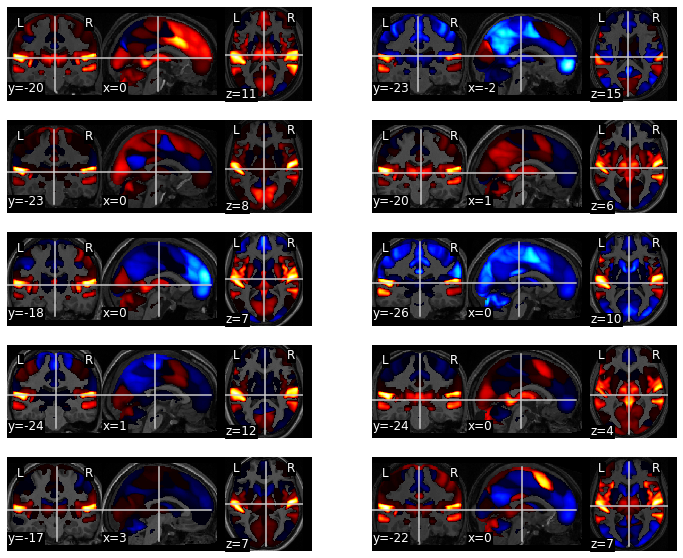

In [16]:
from nilearn.image import iter_img


fig, axes = plt.subplots(figsize=(12, 10), ncols=2, nrows=5)
axes = axes.reshape(-1)

for i, (anat_img, cmap) in enumerate(zip(anats, iter_img(compressed_maps))):
    plotting.plot_stat_map(cmap, bg_img=anat_img, 
                           figure=fig, axes=axes[i],
                           colorbar=False, cut_coords=cut_coords[i])